<div class="alert alert-block alert-success"> <center> <h1> <b> Direct Algorithm Notebook </b> </h1> </center></div>

##### Algorithm to find the minimum of an unknow function without knowing the Lipschitz parameter

In [8]:
from sympy.solvers import solve
from sympy import Symbol
import numpy as np
import sympy as sp
from scipy import spatial
import matplotlib.pyplot as plt

### Function to get the points on the low convex envelope of points (interval size, y)

In [9]:
def get_low_convex(points,f):
    l = np.array([[i[0],f(i[1])] for i in points])
    t = spatial.ConvexHull(l).points
    index_low = np.argmin(t[:,0])
    index_high = np.argmax(t[:,0])
    low_point = t[np.where(t[:,0]==t[index_low,0]),:][0][np.argmin(t[np.where(t[:,0]==t[index_low,0]),:][0][:,1])]
    high_point = t[np.where(t[:,0]==t[index_high,0]),:][0][np.argmin(t[np.where(t[:,0]==t[index_high,0]),:][0][:,1])]
    a = (low_point[1]- high_point[1])/(low_point[0]-high_point[0])
    b = low_point[1]-a*low_point[0]
    for i in t:
        if i[1] > a*i[0] + b:
            t = np.array([j for j in t if (j != i).any()])
    index = np.isin(l,t)
    for i in index:
        if i[0] != i[1]:
            i[0] = False
            i[1] = False
    final = points[index]
    final = final.reshape(int(len(final)/2),2)
    return final

### One iteration of the algorithm 

In [24]:
def do_iteration(points,f):
    if len(points) <= 3:
        points = np.concatenate((points, np.array([[-3,-3]])))#Choose a point not on the curb/not likely to be on it but where the function is define
    t = get_low_convex(points,f)
    for i in t:
        points = np.array([p for p in points if (p != i).any()])
        if  (i !=np.array([-3,-3])).all():
            new_int = i[0]/3
            a = i[1]-i[0]/2
            new_points =np.array([[new_int,a+new_int/2],[new_int,a+3*new_int/2],[new_int,a+5*new_int/2]])
            points = np.concatenate((points,new_points))
    return points

### Example

In [25]:
def f(x):
    return np.sin(x**3)

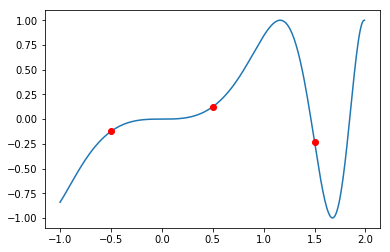

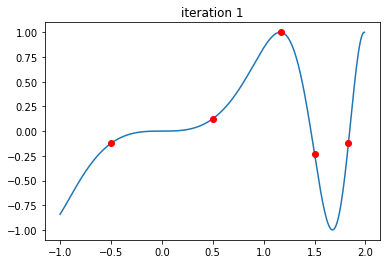

(5, 2)


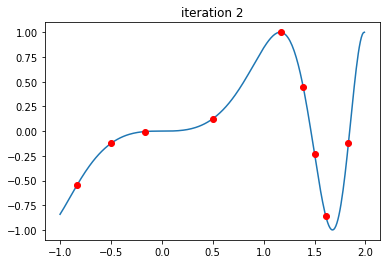

(9, 2)


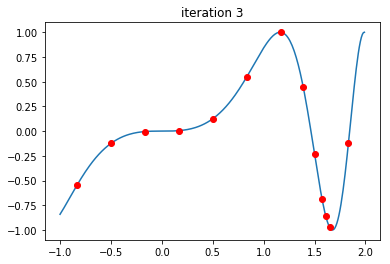

(13, 2)


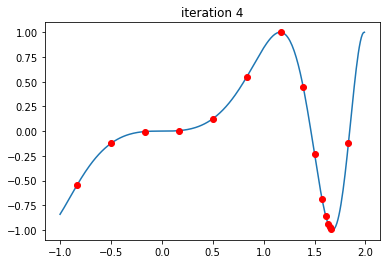

(15, 2)


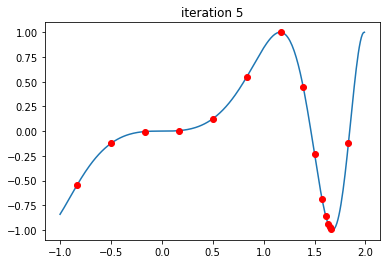

(15, 2)


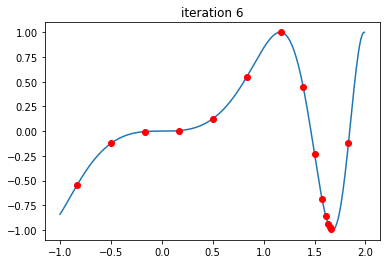

(15, 2)


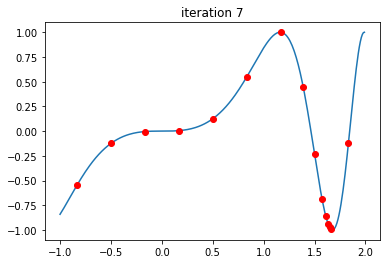

(15, 2)


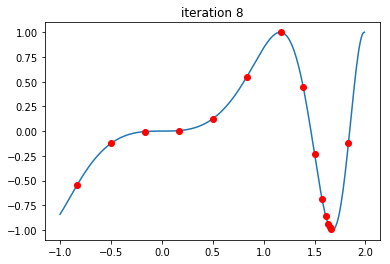

(15, 2)


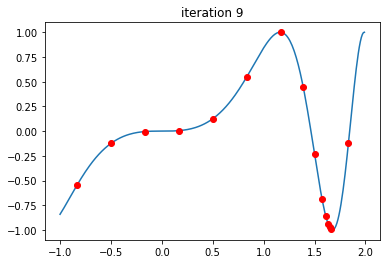

(15, 2)


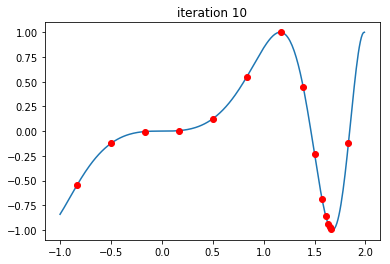

(15, 2)


In [29]:
a = -1
b = 2
int_ = (b-a)/3
points = np.array([[int_,a + int_/2],[int_,a+3*int_/2],[int_,a+5*int_/2]])
x = np.arange(a,b,0.01)
y = f(x)
plt.plot(x,y)
plt.plot(points[:,1],f(points[:,1]),'ro')
plt.show()
for i in range(10):
    points = do_iteration(points,f)
    plt.plot(x,y)
    plt.plot(points[:,1],f(points[:,1]),'ro')
    plt.title('iteration '+str(i+1))
    plt.show()
    print(points.shape)